In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
df=pd.read_csv('/content/drive/MyDrive/OBESITY/obesity.csv')
df2=pd.read_csv('/content/drive/MyDrive/Test_data_version1.xlsx - Sheet1.csv')


df_test = df[df['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)

In [3]:
df

,Patient_ID,DIABETES,FATTY_LIVER,GALL_BLADDER_DISORDERS,OBESITY
0,KHAIGHGPTTL155,9.614014e+08,2.304190e+05,1.093394e+09,2.130295e+08
1,KHAIGHGPTTL156,8.049705e+08,0.000000e+00,5.465359e+08,2.128695e+08
2,KHAIGHGPTTL157,1.029473e+09,1.996852e+05,7.287913e+08,1.823782e+08
3,KHAIGHGPTTL158,1.154868e+09,4.857995e+08,3.646029e+08,2.008906e+08
4,KHAIGHGPTTL159,1.094085e+09,4.610059e+04,5.465819e+08,6.074028e+08
...,...,...,...,...,...
2145,KHTRCLGPTTL52,3.219036e+09,4.610059e+04,5.467200e+08,2.129232e+08
2146,KHYUNQGPTTL10,5.475342e+08,2.428690e+08,3.647641e+08,4.610059e+04
2147,KHYUNQGPTTL11,7.899730e+08,1.382178e+05,2.304190e+05,0.000000e+00
2148,KHAIGPRX1340,7.833461e+05,0.000000e+00,0.000000e+00,5.378402e+04


In [4]:
df2

,Patient_ID,Diabetes,High Blood pressure,Coronary Artery Disease,Arrhythmia,"Heart Failure- Dilated Cardiomyopathy, Restrictive Cardiomyopathy",Cholesterol disorders,Hypertriglyceridemia,"Thyroid Disorders- Hypothyroidism, Hyperthyroidism","Anemia- Microcytic, Hemolytic",...,Fatigue,"Mood Disorders- Anxiety, Schizophrenia, Depression",Urticaria,Essential tremors,Renal Disorders,"Sinusitis, Dust Allergy (Ciliary dykinesia, Hyper IgE syndrome, Angioedma, Chroinc granulomatous)",Obesity,Skin Health,Eye Health,Gastritis
0,KHAIGHGPPGX19,Moderate to High,Mild,-,-,-,Mild,Moderate,0,0,...,-,0,-,-,-,-,Mild,-,-,Mild
1,KHAIGHGPPGX22,Mild,Moderate,Mild,-,-,Moderate,Mild,Mild,0,...,-,0,-,-,-,-,Mild,-,-,Mild
2,KHAIGHGPTTL318,Mild to Moderate,Mild,Mild,-,-,Mild,Mild,Low to Mild,0,...,-,0,-,-,-,-,Low to Mild,-,-,Moderate
3,KHAIGHGPTTL319,Mild to Moderate,Mild to Moderate,Mild,-,-,Moderate,Moderate,Low to Mild,0,...,-,0,-,-,-,-,Moderate,-,-,Moderate
4,KHAIGHGPTTL321,Moderate to High,Mild,Mild,-,-,Mild to Moderate,Mild to Moderate,Low to Mild,0,...,-,0,-,-,-,-,Mild to Moderate,-,-,Mild
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,KHAIGHGPTTL546,Mild,Mild,Mild,-,-,Mild,Moderate,0,0,...,-,Moderate,-,-,-,-,0,-,Mild,-
496,KHAIGHGPTTL548,Low,Moderate to High,Mild,-,-,Moderate,Mild,0,0,...,-,Moderate,-,-,-,-,Moderate,-,-,0
497,KHAIGHGPTTL551,Moderate,Mild,Mild,-,-,Moderate,Moderate,Mild,0,...,-,Moderate,-,-,-,-,Mild,-,-,Moderate
498,KHAIGHGPTTL553,Mild,Mild,Mild,-,-,Mild,Mild,Low,0,...,-,Moderate,-,-,-,-,Mild,-,-,Low to Mild


In [5]:
df_test

,Patient_ID,DIABETES,FATTY_LIVER,GALL_BLADDER_DISORDERS,OBESITY
0,KHAIGHGPTTL318,6.043335e+08,2.429612e+08,1.824397e+08,1.824242e+08
1,KHAIGHGPTTL319,6.085825e+08,1.822094e+08,9.107703e+08,2.305030e+05
2,KHAIGHGPTTL321,2.581483e+09,3.071413e+05,3.644648e+08,4.723112e+08
3,KHAIGHGPTTL348,7.433628e+08,2.430380e+08,3.643727e+08,4.436289e+08
4,KHAIGHGPTTL350,8.057649e+08,2.429919e+08,5.770269e+08,5.916564e+07
...,...,...,...,...,...
462,KHSSRIGPTTL8,3.652940e+08,1.075680e+05,1.822094e+08,2.995419e+05
463,KHSSRIGPTTL9,1.154967e+09,1.536686e+05,1.822094e+08,3.948790e+08
464,KHTENTGPTTL15,9.720594e+08,4.610059e+04,1.383018e+05,1.824397e+08
465,KHTRCLGPTTL52,3.219036e+09,4.610059e+04,5.467200e+08,2.129232e+08


In [6]:
labels=pd.read_csv('/content/drive/MyDrive/OBESITY/new_labels_Obesity_set1.csv')

In [7]:
labels['new_labels'].value_counts()

,count
new_labels,
2,1122
1,819
0,205
3,4


In [8]:
labels2=pd.read_csv('/content/drive/MyDrive/OBESITY/new_labels_Obesity_set1.csv')

In [9]:
df_train = labels[~labels['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)


In [10]:
df_train

,Patient_ID,DIABETES,FATTY_LIVER,GALL_BLADDER_DISORDERS,OBESITY,Obesity,new_labels
0,KHAIGHGPTTL155,9.614014e+08,2.304190e+05,1.093394e+09,2.130295e+08,0,2
1,KHAIGHGPTTL156,8.049705e+08,0.000000e+00,5.465359e+08,2.128695e+08,0,2
2,KHAIGHGPTTL157,1.029473e+09,1.996852e+05,7.287913e+08,1.823782e+08,0,1
3,KHAIGHGPTTL158,1.154868e+09,4.857995e+08,3.646029e+08,2.008906e+08,0,2
4,KHAIGHGPTTL159,1.094085e+09,4.610059e+04,5.465819e+08,6.074028e+08,0,2
...,...,...,...,...,...,...,...
1678,KHTENTGPTTL14,7.903337e+08,2.429918e+08,3.645107e+08,6.560451e+08,0,2
1679,KHTENTGPTTL16,1.641437e+09,2.430380e+08,5.770269e+08,3.643495e+08,0,1
1680,KHYUNQGPTTL10,5.475342e+08,2.428690e+08,3.647641e+08,4.610059e+04,0,2
1681,KHAIGPRX1340,7.833461e+05,0.000000e+00,0.000000e+00,5.378402e+04,0,1


In [11]:
df_train_set1=df_train.copy()
df_train_set1=df_train_set1.drop(columns=['Patient_ID','Obesity'])

In [25]:
scaler=StandadScaler()
smote=SMOTE()
test_split=0.2

NameError: name 'StandadScaler' is not defined

In [26]:
X = df_train_set1.drop(columns=['new_labels'])
y = df_train_set1['new_labels']
X_balanced, y_balanced = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=test_split, random_state=42, stratify=y_balanced
)
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [27]:
y_train.value_counts()

,count
new_labels,
1,720
2,720
0,720


In [28]:
x_train_valid=df_train_set1.drop(columns=['new_labels'])
y_train_valid=df_train_set1['new_labels']
x_train_valid_scaled=scaler.transform(x_train_valid)
x_train_valid_scaled=pd.DataFrame(x_train_valid_scaled,columns=x_train_valid.columns,index=x_train_valid.index)

In [29]:
df_test=labels[labels['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)

In [30]:
df_test

,Patient_ID,DIABETES,FATTY_LIVER,GALL_BLADDER_DISORDERS,OBESITY,Obesity,new_labels
0,KHAIGHGPTTL318,6.043335e+08,2.429612e+08,1.824397e+08,1.824242e+08,Low to Mild,0
1,KHAIGHGPTTL319,6.085825e+08,1.822094e+08,9.107703e+08,2.305030e+05,Moderate,2
2,KHAIGHGPTTL321,2.581483e+09,3.071413e+05,3.644648e+08,4.723112e+08,Mild to Moderate,2
3,KHAIGHGPTTL348,7.433628e+08,2.430380e+08,3.643727e+08,4.436289e+08,Moderate,2
4,KHAIGHGPTTL350,8.057649e+08,2.429919e+08,5.770269e+08,5.916564e+07,Mild,1
...,...,...,...,...,...,...,...
462,KHSSRIGPTTL8,3.652940e+08,1.075680e+05,1.822094e+08,2.995419e+05,0,1
463,KHSSRIGPTTL9,1.154967e+09,1.536686e+05,1.822094e+08,3.948790e+08,Mild,1
464,KHTENTGPTTL15,9.720594e+08,4.610059e+04,1.383018e+05,1.824397e+08,-,1
465,KHTRCLGPTTL52,3.219036e+09,4.610059e+04,5.467200e+08,2.129232e+08,Mild,1


In [31]:
df_test=df_test.drop(columns=['Patient_ID','Obesity'])

In [32]:
x_test_valid=df_test.drop(columns=['new_labels'])
y_test_valid=df_test['new_labels']
x_test_valid_scaled=scaler.transform(x_test_valid)
x_test_valid_scaled=pd.DataFrame(x_test_valid_scaled,columns=x_test_valid.columns,index=x_test_valid.index)


In [33]:
y_test.value_counts()

,count
new_labels,
0,180
2,180
1,180


In [34]:
X_test.value_counts()


,,,,count
DIABETES,FATTY_LIVER,GALL_BLADDER_DISORDERS,OBESITY,
3.226201e+05,4.610059e+04,1.822093e+08,0.000000e+00,1
1.562960e+09,2.150521e+05,3.645108e+08,6.075103e+08,1
1.593808e+09,2.458698e+05,5.838828e+08,1.824474e+08,1
1.581584e+09,1.229349e+05,5.464437e+08,2.996539e+05,1
1.581272e+09,7.285608e+08,1.823935e+08,5.768502e+08,1
...,...,...,...,...
9.864288e+08,2.430013e+08,5.659480e+08,2.127592e+08,1
9.861554e+08,1.383018e+05,7.593746e+08,1.824166e+08,1
9.816929e+08,1.398732e+06,7.474188e+08,2.972362e+05,1


Extra Trees Classifier Metrics:
Accuracy: 0.95
Precision: 0.9497422267782246
Recall: 0.95
F1-score: 0.9498072066481046
Confusion Matrix:
[[179   0   1]
 [  2 168  10]
 [  3  11 166]]


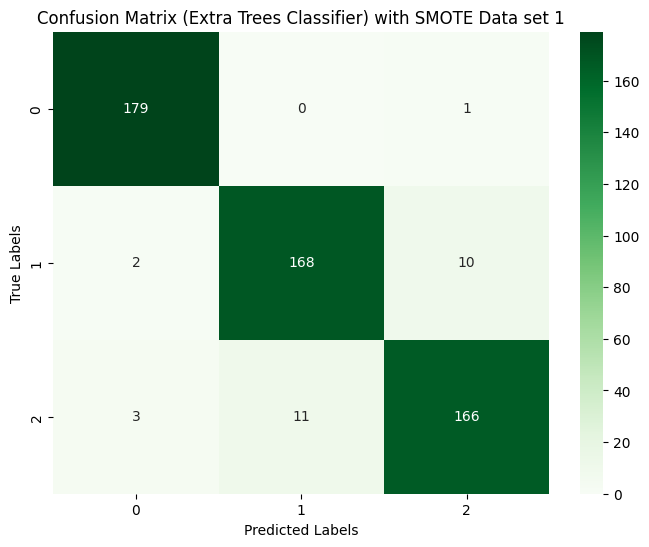

In [35]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Extra Trees Classifier
et_classifier = ExtraTreesClassifier(
    n_estimators=100,
    max_depth=20,
    min_samples_split=2,
    random_state=42
)
et_classifier.fit(X_train_scaled, y_train)
y_pred_et = et_classifier.predict(X_test_scaled)

# Evaluate the Extra Trees model
accuracy_et = accuracy_score(y_test, y_pred_et)
precision_et = precision_score(y_test, y_pred_et, average='weighted')
recall_et = recall_score(y_test, y_pred_et, average='weighted')
f1_et = f1_score(y_test, y_pred_et, average='weighted')
conf_matrix_et = confusion_matrix(y_test, y_pred_et)

# Print the evaluation metrics
print("Extra Trees Classifier Metrics:")
print(f"Accuracy: {accuracy_et}")
print(f"Precision: {precision_et}")
print(f"Recall: {recall_et}")
print(f"F1-score: {f1_et}")
print(f"Confusion Matrix:\n{conf_matrix_et}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_et, annot=True, fmt="d", cmap="Greens",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Extra Trees Classifier) with SMOTE Data set 1")
plt.show()


Accuracy (Extra Trees): 0.983957219251337
Precision (Extra Trees): 0.9839968564812918
Recall (Extra Trees): 0.983957219251337
F1-score (Extra Trees): 0.9839611942319023
Confusion Matrix (Extra Trees):
[[160   0   1]
 [  2 610  10]
 [  3  11 886]]


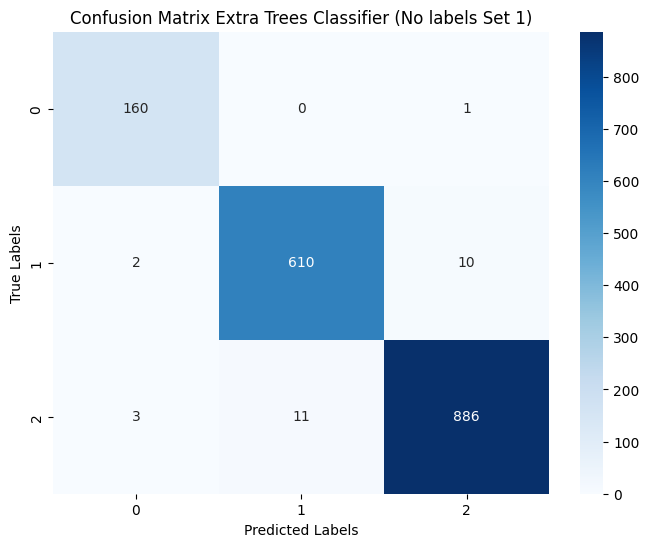

In [36]:


# Predict on training data
y_pred_train_et = et_classifier.predict(x_train_valid_scaled)

# Evaluate the model
accuracy_et = accuracy_score(y_train_valid, y_pred_train_et)
precision_et = precision_score(y_train_valid, y_pred_train_et, average='weighted')  # Use 'weighted' for multi-class
recall_et = recall_score(y_train_valid, y_pred_train_et, average='weighted')
f1_et = f1_score(y_train_valid, y_pred_train_et, average='weighted')
conf_matrix_et = confusion_matrix(y_train_valid, y_pred_train_et)

# Print metrics
print(f"Accuracy (Extra Trees): {accuracy_et}")
print(f"Precision (Extra Trees): {precision_et}")
print(f"Recall (Extra Trees): {recall_et}")
print(f"F1-score (Extra Trees): {f1_et}")
print(f"Confusion Matrix (Extra Trees):\n{conf_matrix_et}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_et, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_train_valid), yticklabels=np.unique(y_train_valid))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Extra Trees Classifier (No labels Set 1)")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy (Extra Trees Test): 0.7044967880085653
Precision (Extra Trees Test): 0.6952862864916739
Recall (Extra Trees Test): 0.7044967880085653
F1-score (Extra Trees Test): 0.6971640704818687
Confusion Matrix (Extra Trees Test):
[[ 17  12  15   0]
 [  8 145  44   0]
 [  3  52 167   0]
 [  0   2   2   0]]


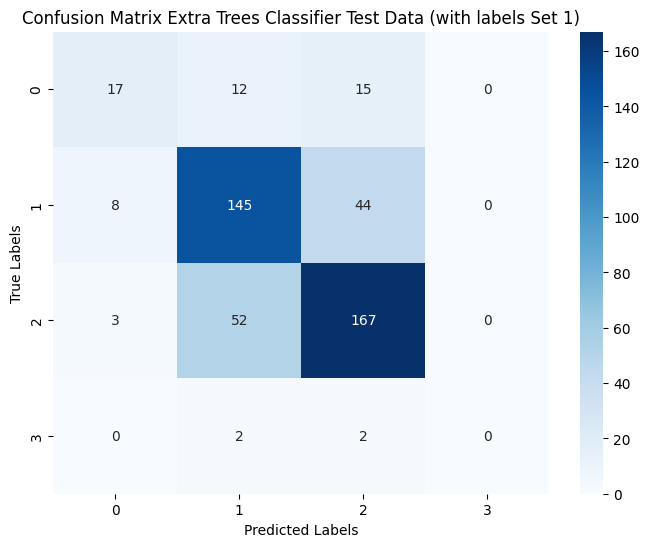

In [37]:
# Predict on test data
y_pred_test_et = et_classifier.predict(x_test_valid_scaled)

# Evaluate the model on test data
accuracy_et_test = accuracy_score(y_test_valid, y_pred_test_et)
precision_et_test = precision_score(y_test_valid, y_pred_test_et, average='weighted')  # Use 'weighted' for multi-class
recall_et_test = recall_score(y_test_valid, y_pred_test_et, average='weighted')
f1_et_test = f1_score(y_test_valid, y_pred_test_et, average='weighted')
conf_matrix_et_test = confusion_matrix(y_test_valid, y_pred_test_et)

# Print metrics
print(f"Accuracy (Extra Trees Test): {accuracy_et_test}")
print(f"Precision (Extra Trees Test): {precision_et_test}")
print(f"Recall (Extra Trees Test): {recall_et_test}")
print(f"F1-score (Extra Trees Test): {f1_et_test}")
print(f"Confusion Matrix (Extra Trees Test):\n{conf_matrix_et_test}")

# Plot confusion matrix for test data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_et_test, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test_valid), yticklabels=np.unique(y_test_valid))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Extra Trees Classifier Test Data (with labels Set 1)")
plt.show()